In [1]:
import ephem
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bogota = ephem.Observer()
m = ephem.Moon()
s = ephem.Sun()
bogota.lon, bogota.lat = '-74.0721', '4.7110'

In [110]:
def plot_day(day=1, month=6,year=2017):
    n_points = 24
    sun_alt = np.ones(n_points)
    sun_az = np.ones(n_points)
    moon_alt = np.ones(n_points)
    moon_az = np.ones(n_points)

    meses = {5:'Mayo', 6:'Junio'}
    base_date = ephem.Date('{}/{}/{}'.format(year, month, day))
    for i in range(24):
        bogota.date =  base_date + 5/24 + i/24
        s.compute(bogota)
        m.compute(bogota)
        sun_az[i] = s.az
        sun_alt[i] = s.alt
        moon_az[i] = m.az
        moon_alt[i] = m.alt
        #print(s.alt, s.az)
        #print(s.alt, s.az, m.alt, m.az)

    fig = plt.figure(figsize=(18,8))
    verts = list(zip([-1., 1., 1., -1.], [-1., -1., 1., -1.]))
    hour = np.arange(24)
    plt.scatter(hour[moon_alt>0],moon_alt[moon_alt>0], marker=(6,3),s=400, alpha=0.5, color='black')
    plt.scatter(hour[sun_alt>0],sun_alt[sun_alt>0], marker=(6,1),s=450, alpha=0.5, color='black')
    plt.scatter(hour[moon_alt<0],moon_alt[moon_alt<0], marker=(6,3),s=400, color='black')
    plt.scatter(hour[sun_alt<0],sun_alt[sun_alt<0], marker=(6,1),s=450, color='black')

    hour_line = np.linspace(-0.5,24.,100)
    y_max = np.ones(100)*np.pi/2
    plt.plot(hour_line, y_max, lw=5, c='black', alpha=0.1)
    plt.plot(hour_line, -y_max*0, lw=5, c='black', alpha=0.1)
    plt.plot(hour_line, -y_max, lw=5, c='black', alpha=0.1)

    fecha = "{} {} {}".format(meses[month], day, year)
    plt.title(fecha, fontsize=40)
    a = plt.yticks([])
    a = plt.xticks([0,6,12,18,24], fontsize=20)
    filename = fecha.replace(" ", "_")
    plt.savefig(filename+'.png')

/home/forero/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


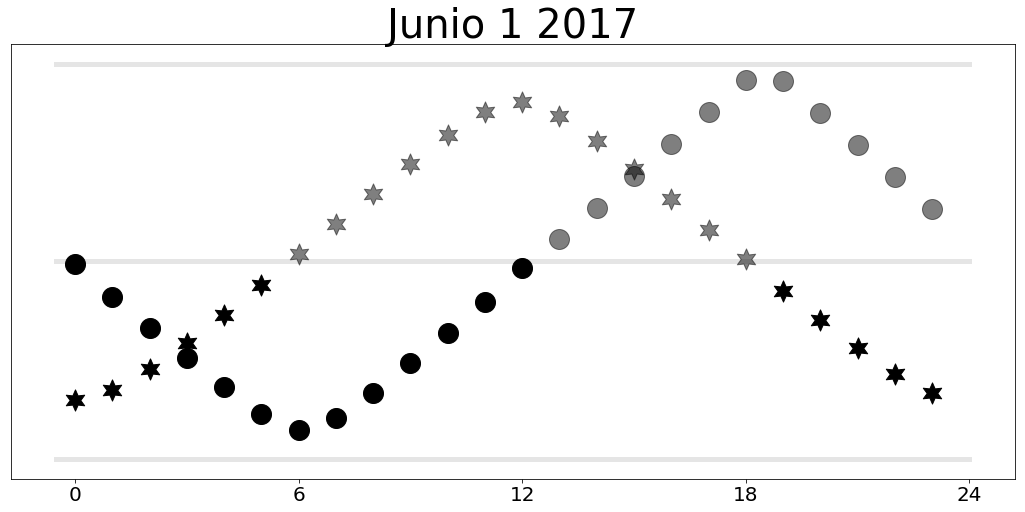

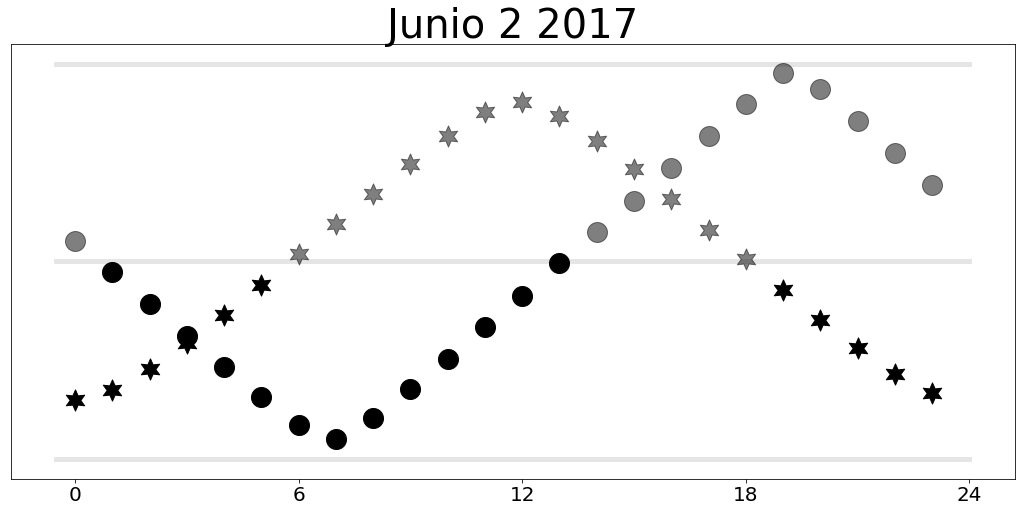

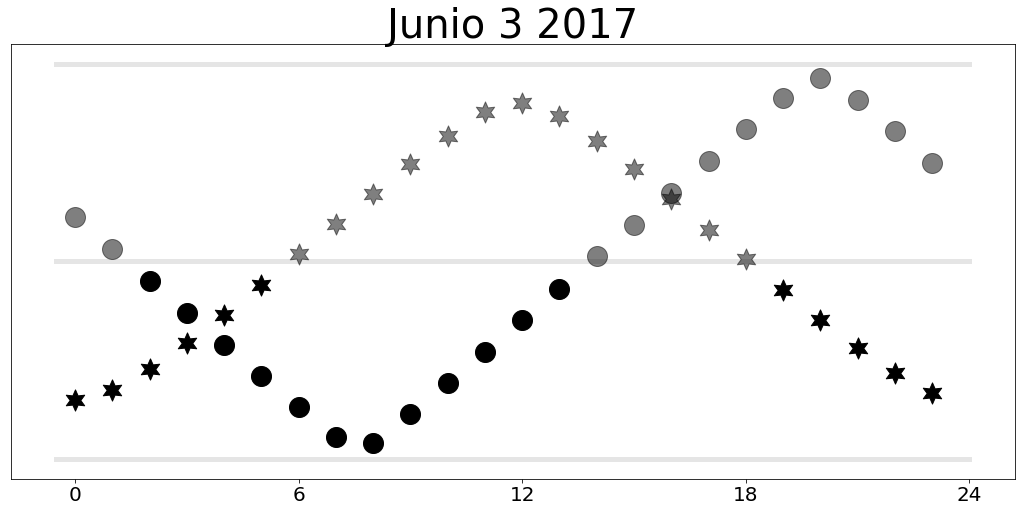

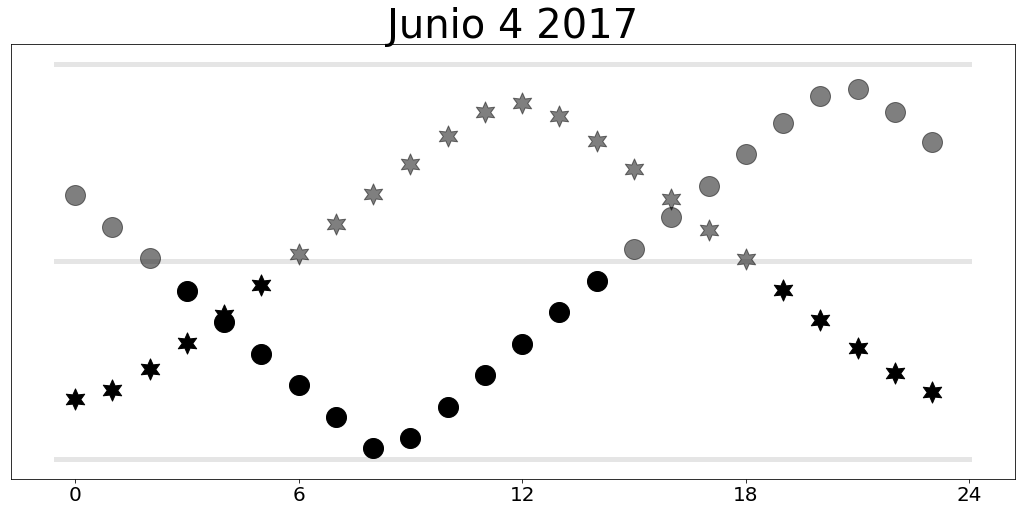

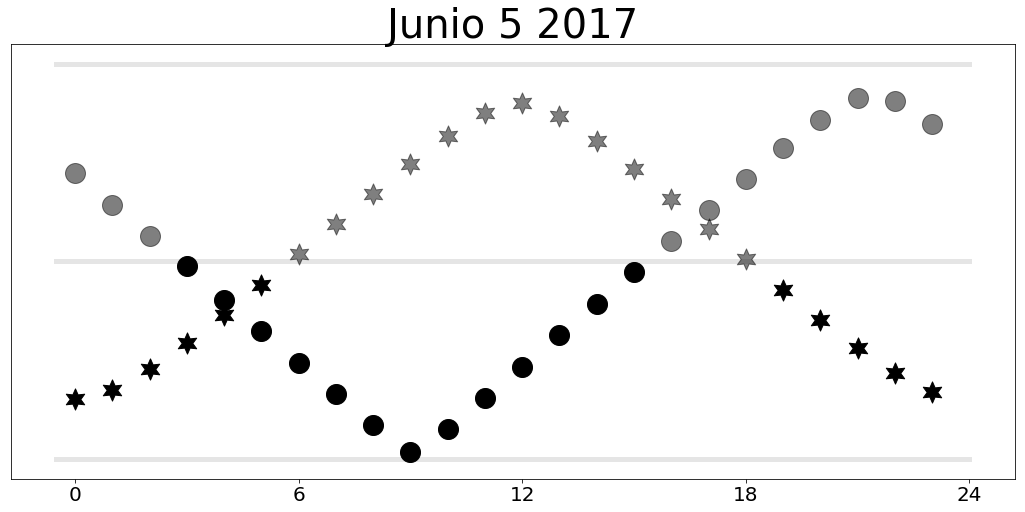

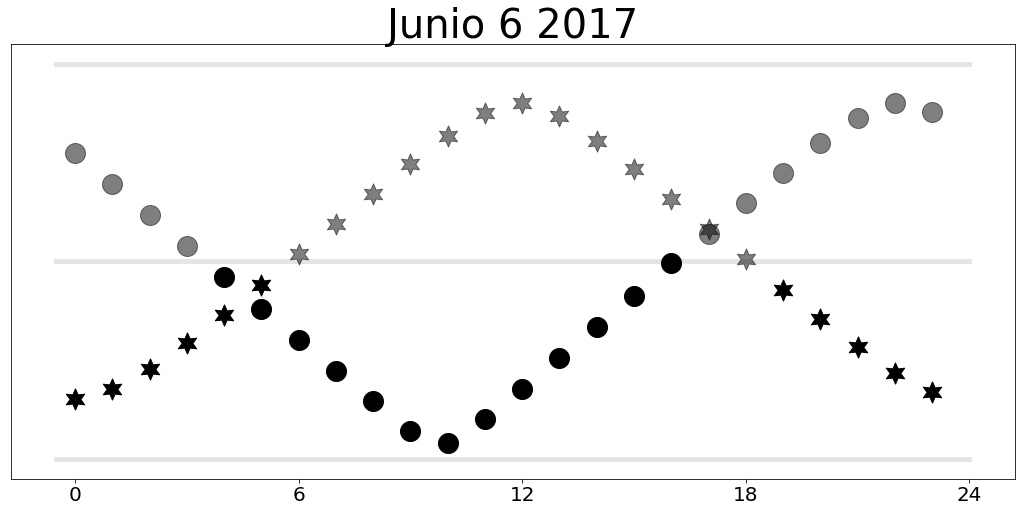

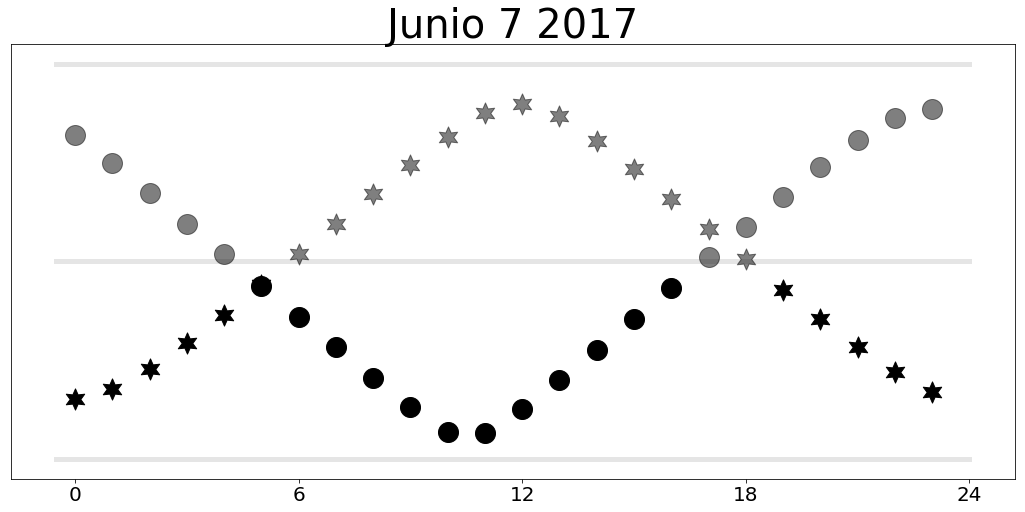

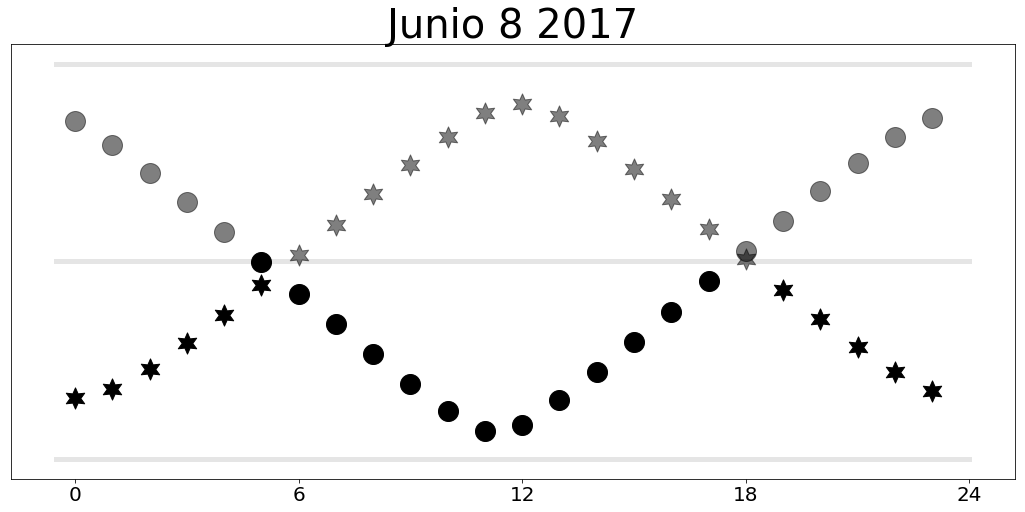

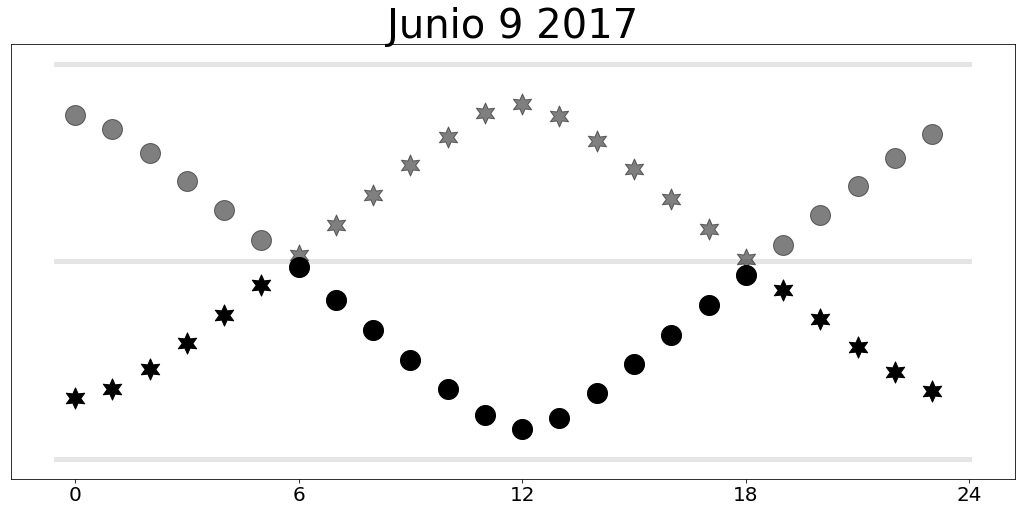

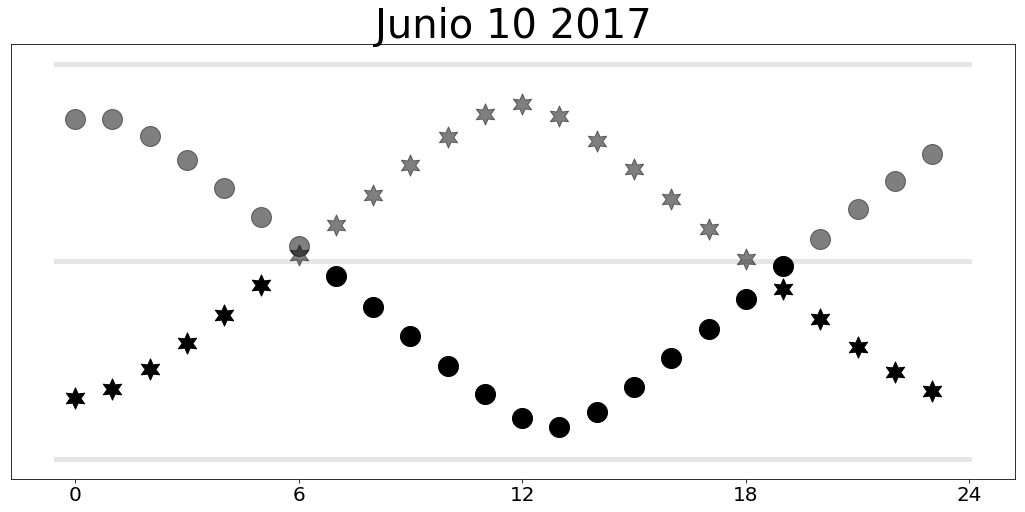

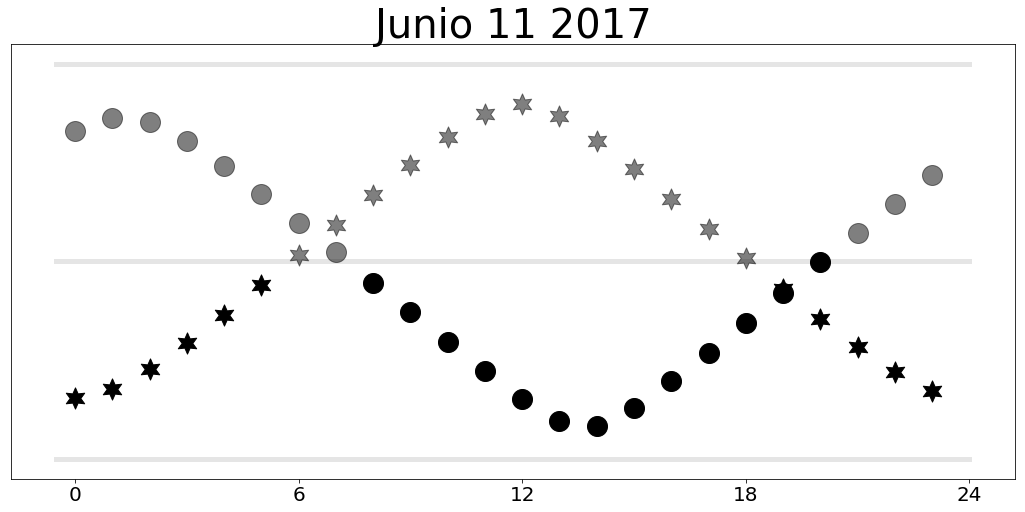

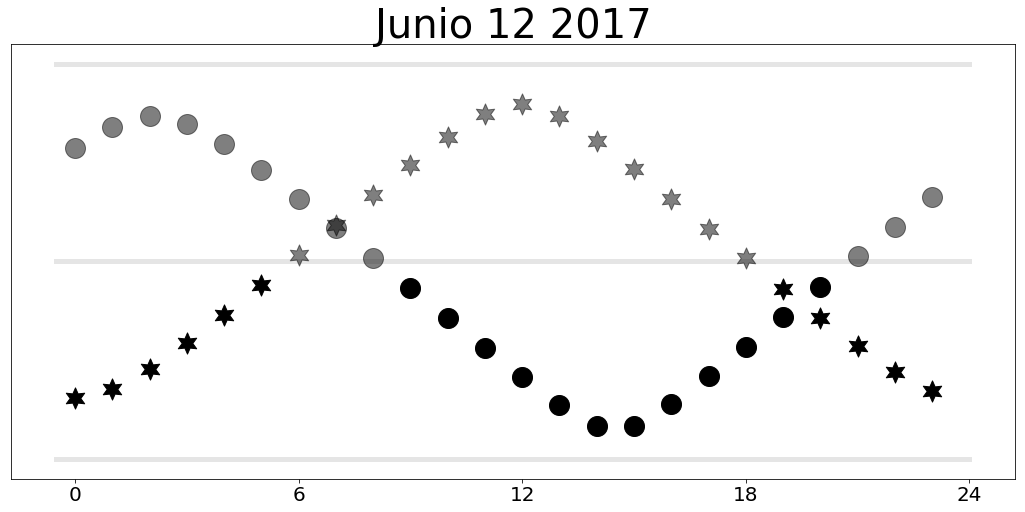

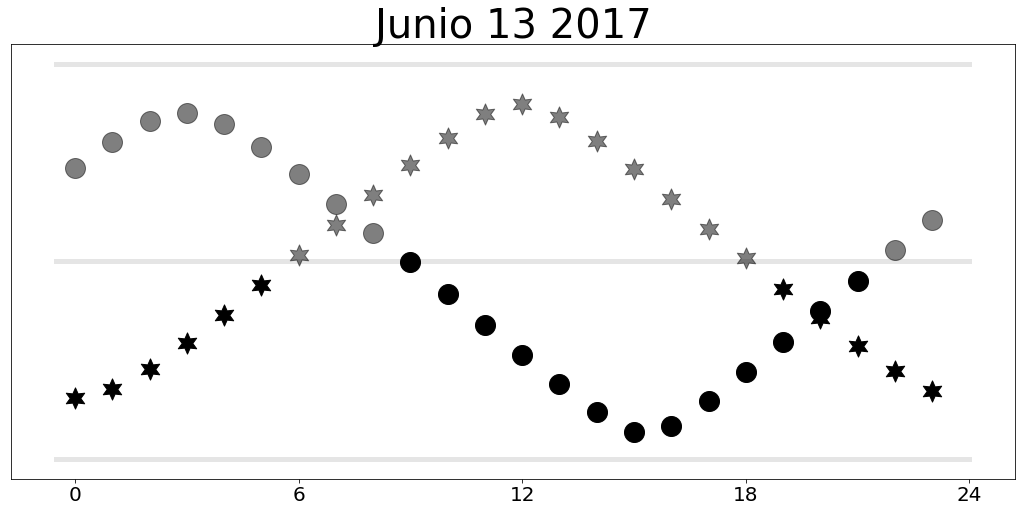

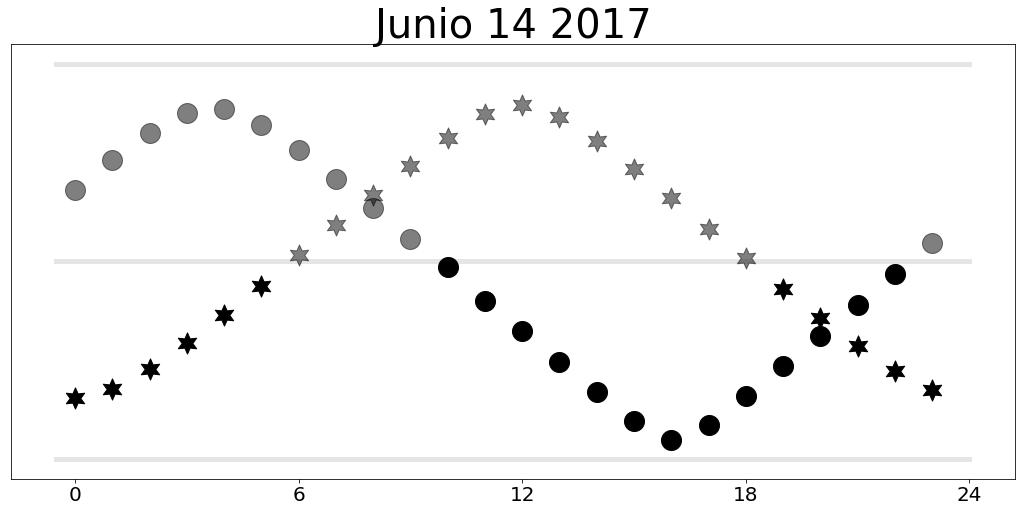

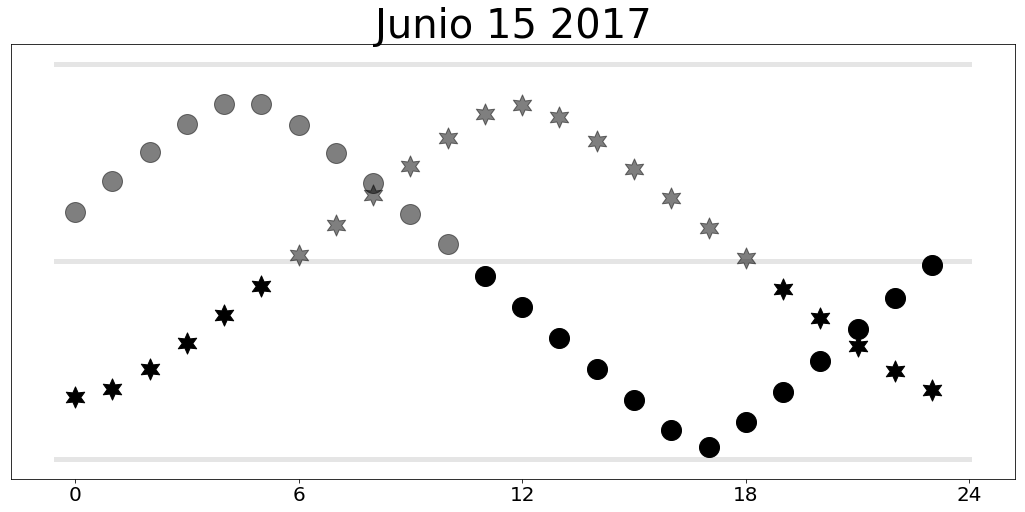

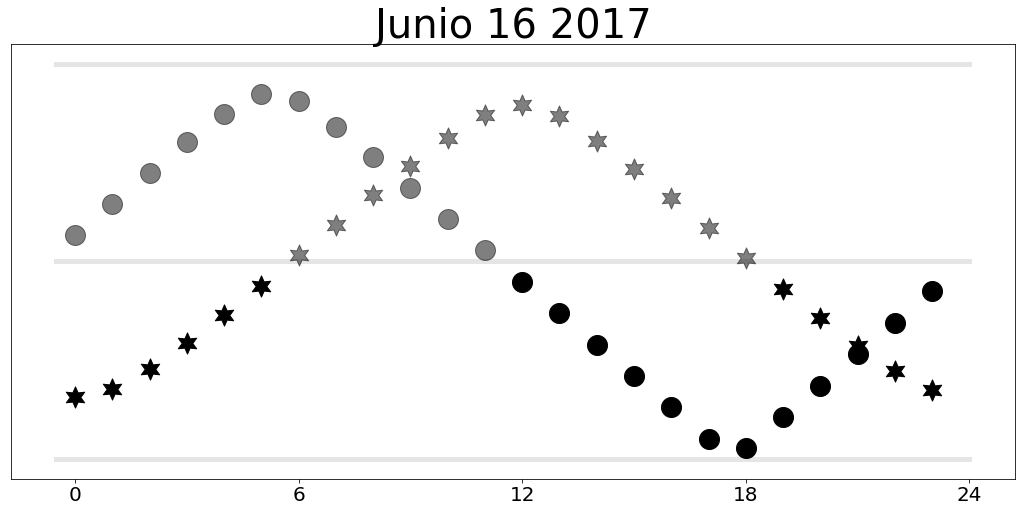

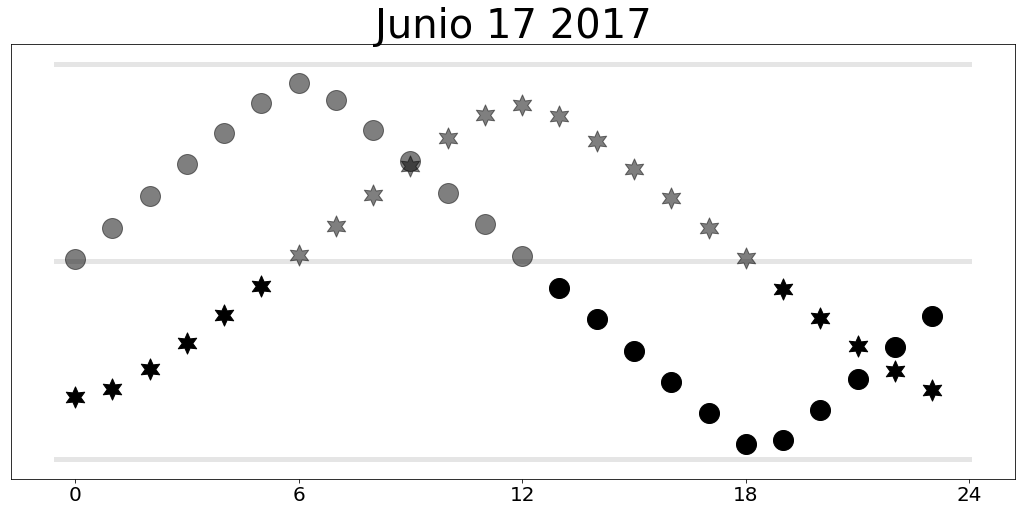

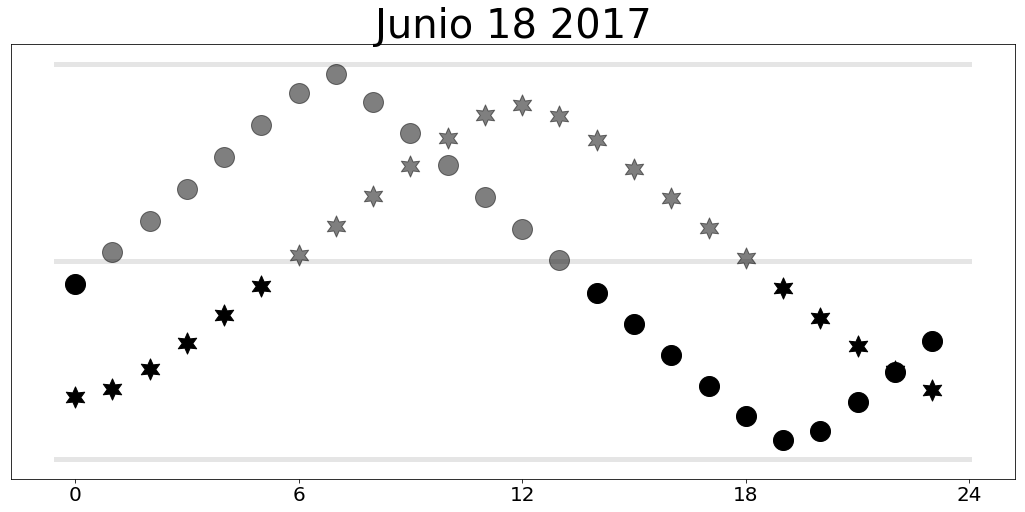

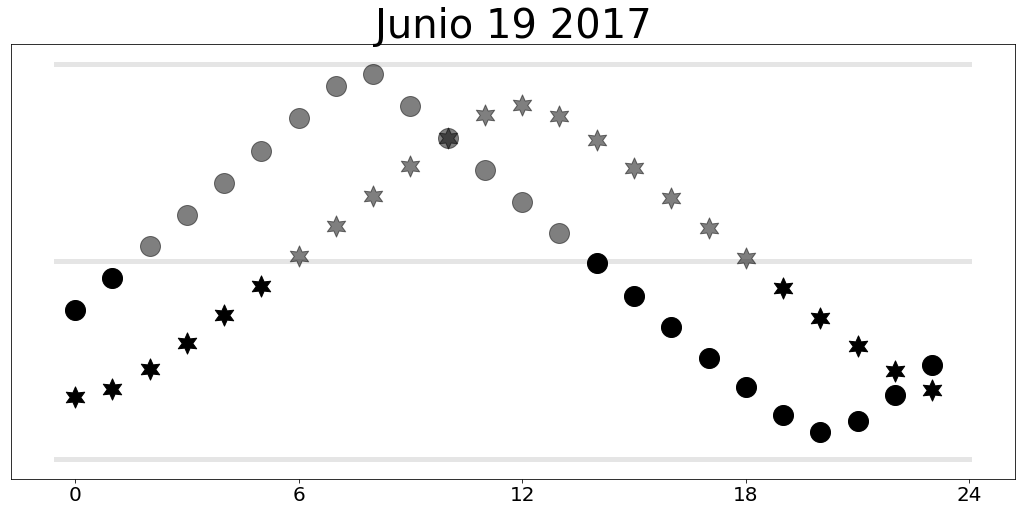

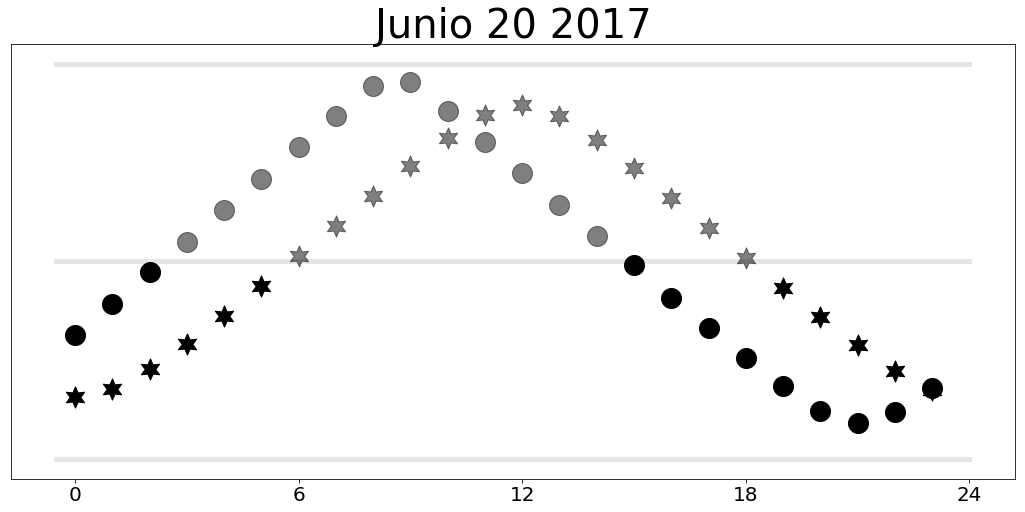

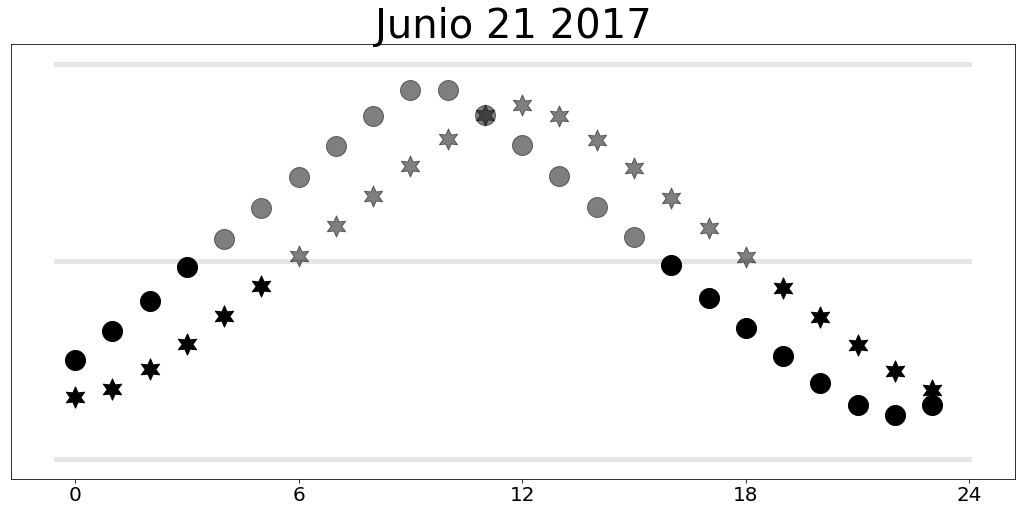

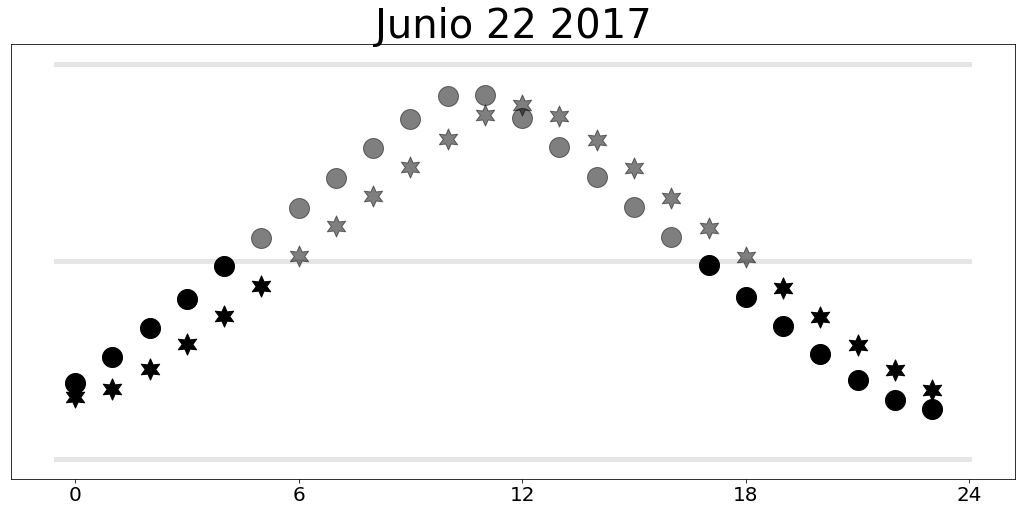

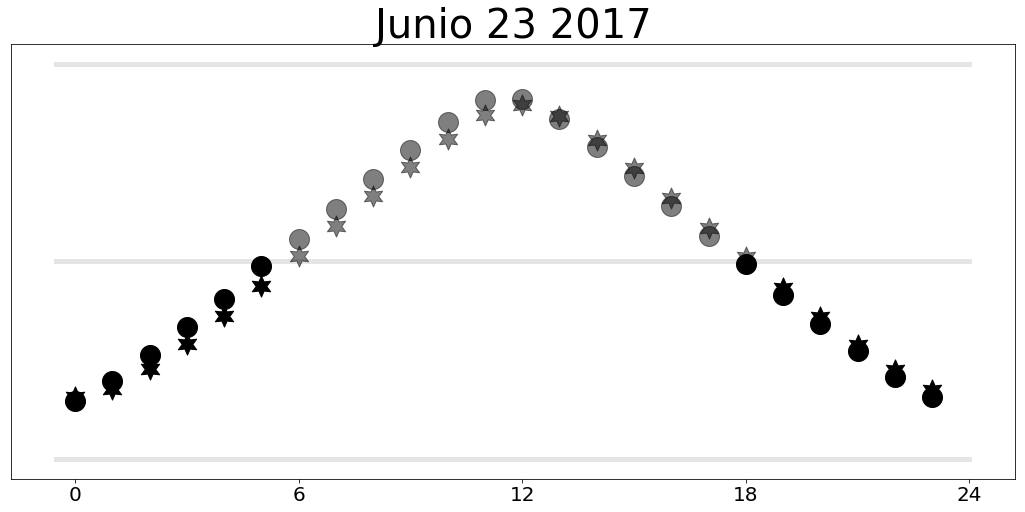

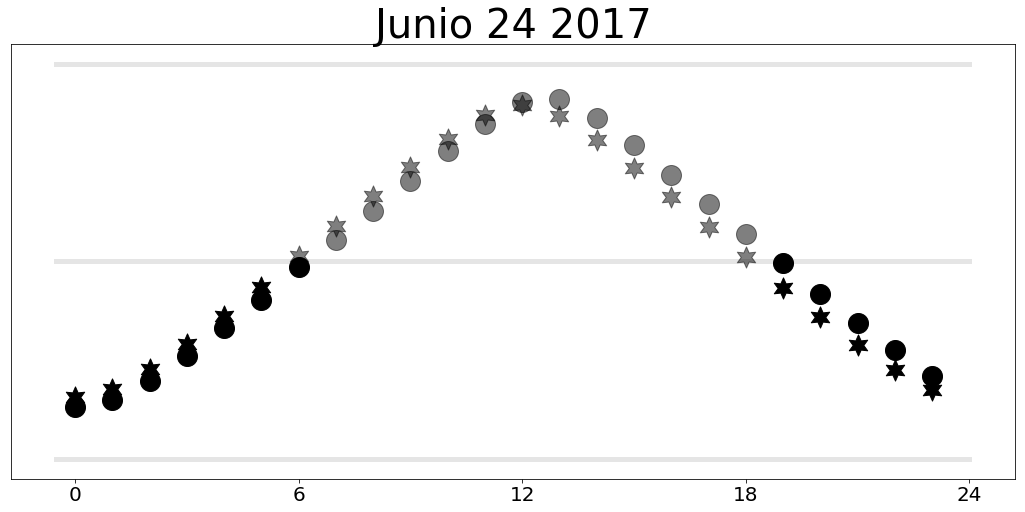

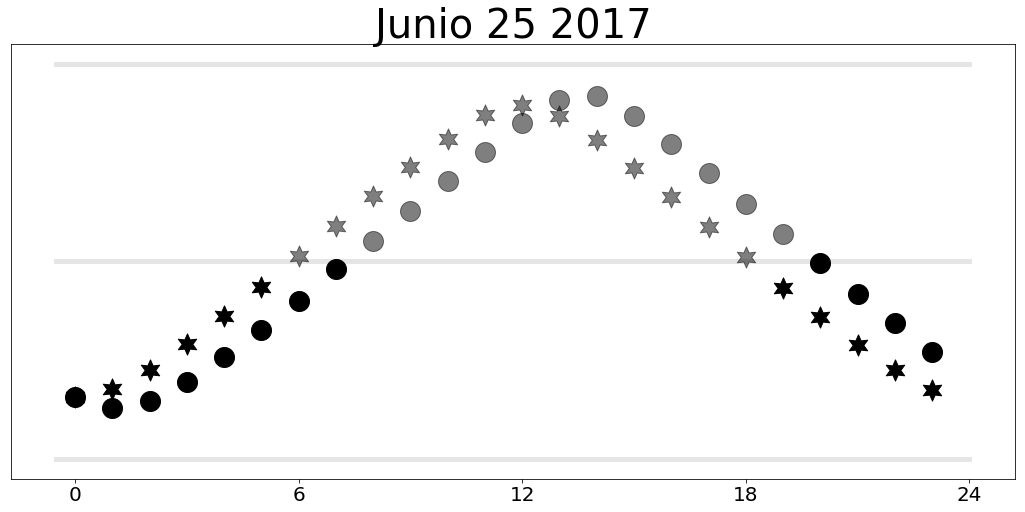

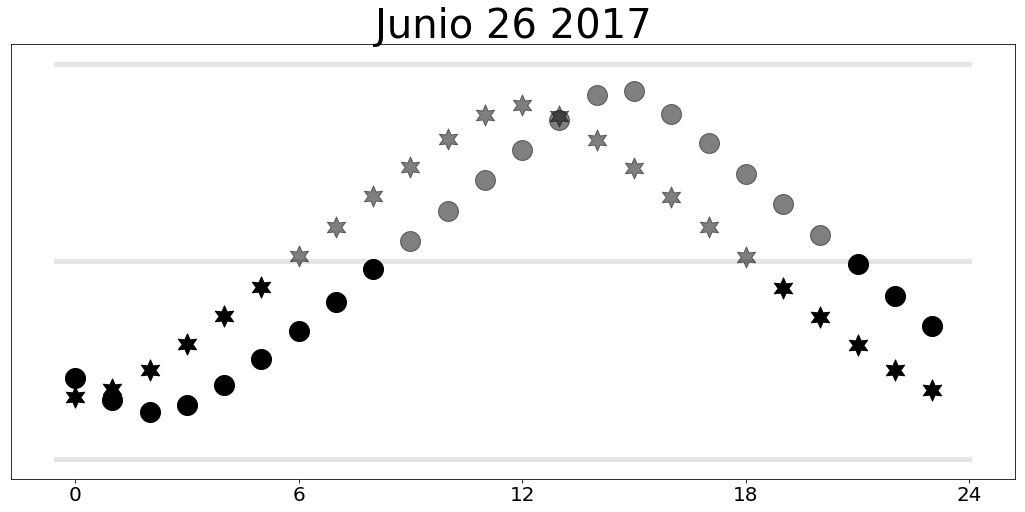

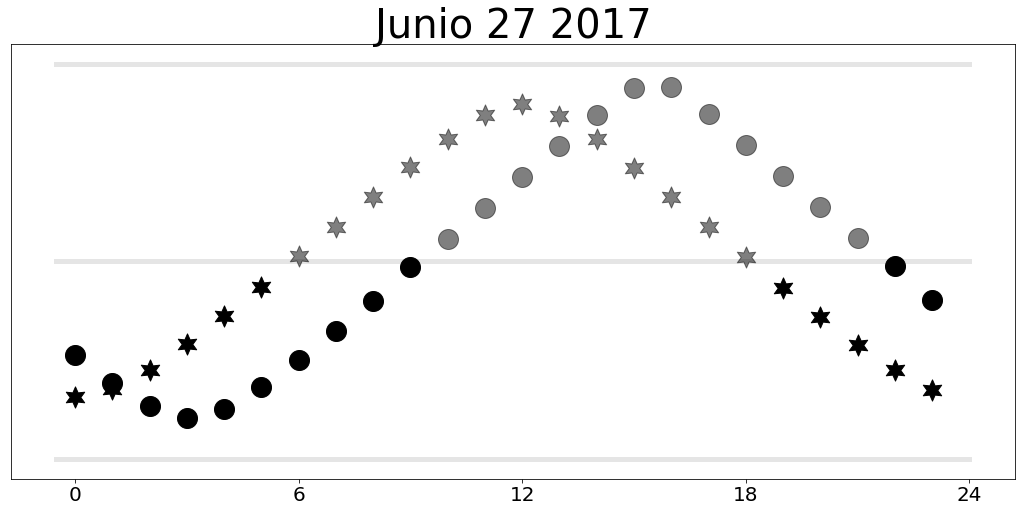

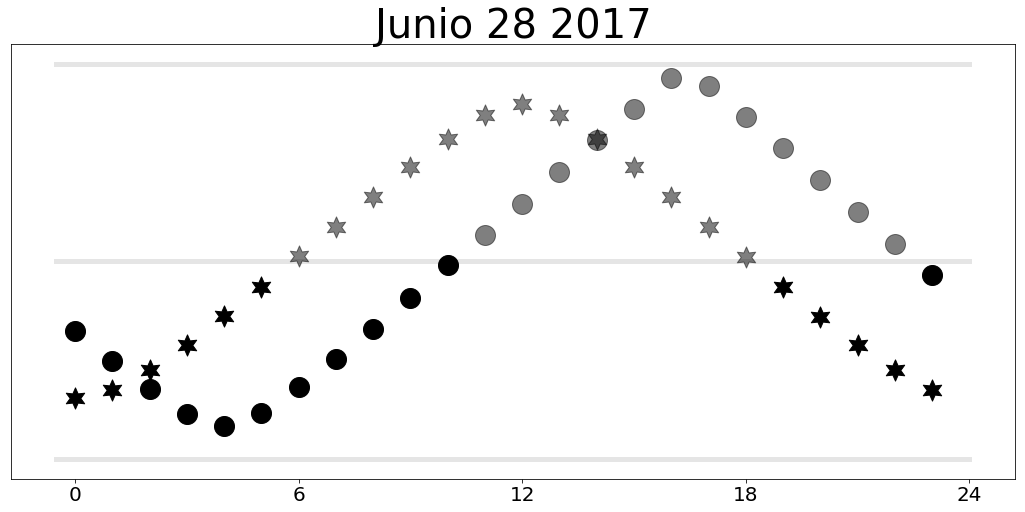

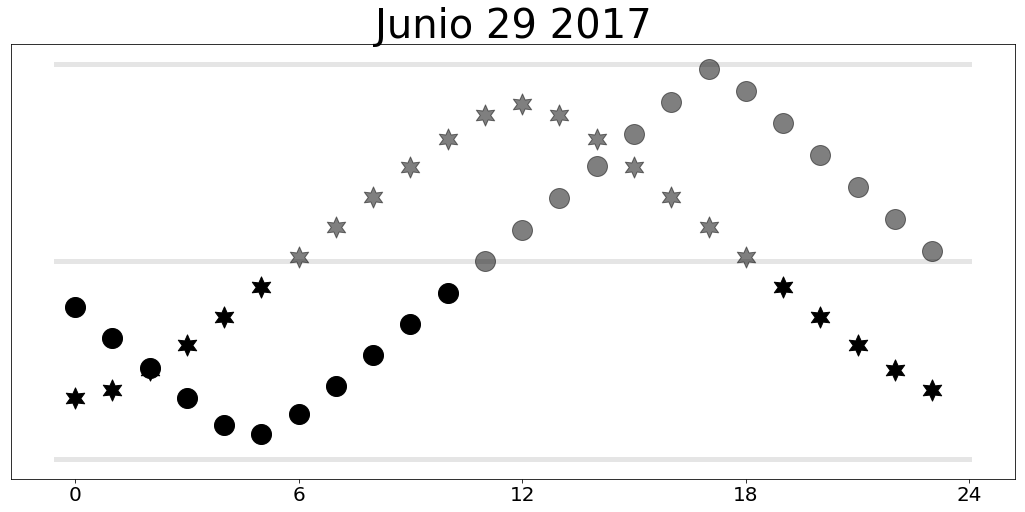

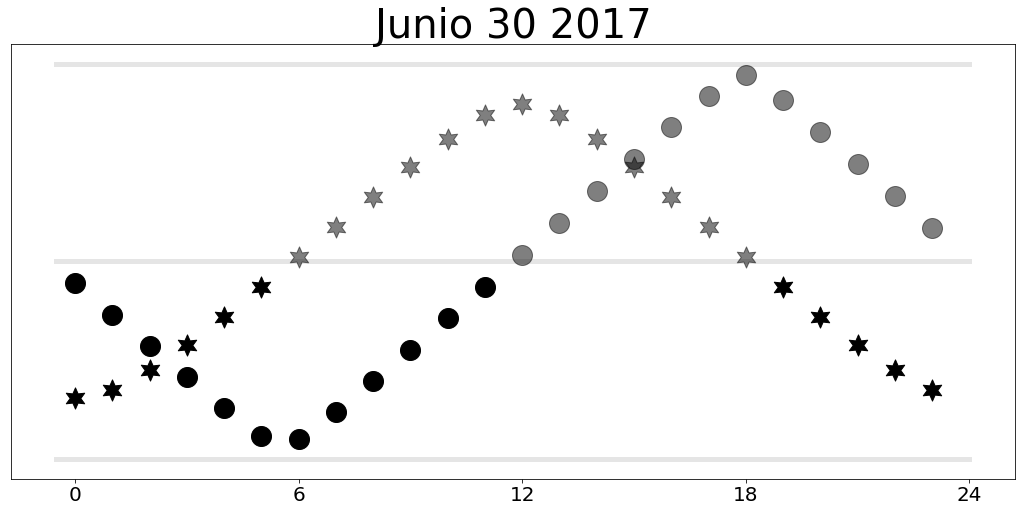

In [112]:
for day in range(1,31):
    plot_day(day=day)

In [129]:
print(bogota.date)

2017/5/30 23:30:00
